First 5 rows:
              Name           Timestamp   Status Description  \
0  Conveyor Belt 4 2026-05-14 00:15:00  Running         NaN   
1  Conveyor Belt 4 2026-05-14 00:30:00  Running         NaN   
2  Conveyor Belt 4 2026-05-14 00:45:00  Running         NaN   
3  Conveyor Belt 4 2026-05-14 01:00:00  Running         NaN   
4  Conveyor Belt 4 2026-05-14 01:15:00  Running         NaN   

   Vibration Frequency  Vibration Amplitude  Bearing Temperature  \
0              1498.37                 0.04               77.076   
1              1503.22                 0.06               77.307   
2              1508.11                 0.04               77.474   
3              1498.13                 0.06               77.785   
4              1494.89                 0.05               77.813   

   Motor Temperature  Belt Load  Torque  Noise Levels  Current and Voltage  \
0             96.975       1.07  295.50         59.68                14.34   
1             96.755       1.21  314.38   

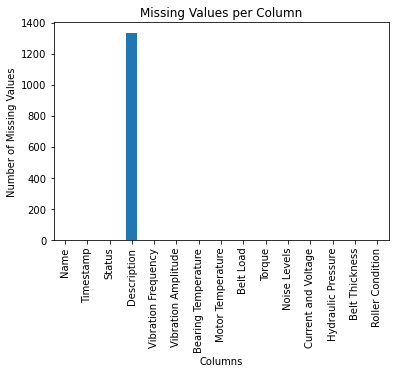

First 5 rows:
              Name           Timestamp   Status Description  \
0  Conveyor Belt 4 2026-05-14 00:15:00  Running         NaN   
1  Conveyor Belt 4 2026-05-14 00:30:00  Running         NaN   
2  Conveyor Belt 4 2026-05-14 00:45:00  Running         NaN   
3  Conveyor Belt 4 2026-05-14 01:00:00  Running         NaN   
4  Conveyor Belt 4 2026-05-14 01:15:00  Running         NaN   

   Vibration Frequency  Vibration Amplitude  Bearing Temperature  \
0              1498.37                 0.04               77.076   
1              1503.22                 0.06               77.307   
2              1508.11                 0.04               77.474   
3              1498.13                 0.06               77.785   
4              1494.89                 0.05               77.813   

   Motor Temperature  Belt Load  Torque  Noise Levels  Current and Voltage  \
0             96.975       1.07  295.50         59.68                14.34   
1             96.755       1.21  314.38   

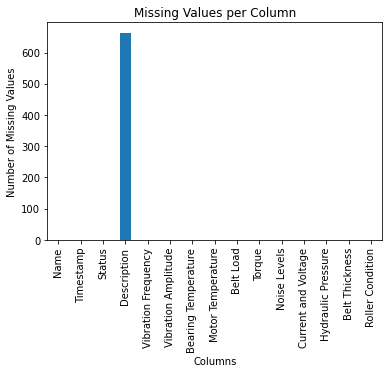

First 5 rows:
              Name           Timestamp   Status Description  \
0  Conveyor Belt 4 2026-05-14 00:15:00  Running         NaN   
1  Conveyor Belt 4 2026-05-14 00:30:00  Running         NaN   
2  Conveyor Belt 4 2026-05-14 00:45:00  Running         NaN   
3  Conveyor Belt 4 2026-05-14 01:00:00  Running         NaN   
4  Conveyor Belt 4 2026-05-14 01:15:00  Running         NaN   

   Vibration Frequency  Vibration Amplitude  Bearing Temperature  \
0              1498.37                 0.04               77.076   
1              1503.22                 0.06               77.307   
2              1508.11                 0.04               77.474   
3              1498.13                 0.06               77.785   
4              1494.89                 0.05               77.813   

   Motor Temperature  Belt Load  Torque  Noise Levels  Current and Voltage  \
0             96.975       1.07  295.50         59.68                14.34   
1             96.755       1.21  314.38   

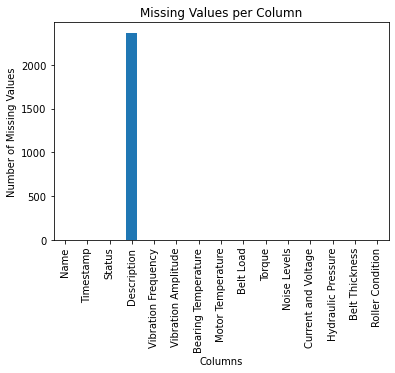

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = 'Belt 1 Test Data.xlsx'  # Update with your actual file path if needed
all_sheets = pd.read_excel(file_path, header=None, sheet_name=None)

column_names = [
    "Name","Timestamp", "Status", "Description","Vibration Frequency","Vibration Amplitude", "Bearing Temperature", 
    "Motor Temperature", "Belt Load", "Torque", "Noise Levels", "Current and Voltage", 
    "Hydraulic Pressure","Belt Thickness", "Roller Condition" 
    
]
for sheet_name, df in all_sheets.items():
    df.columns = column_names
    
    print("First 5 rows:")
    print(df.head())
    print("\nData Info:")
    print(df.info())
    print("\nSummary Statistics:")
    print(df.describe())

    # Step 3: Check for missing values
    missing = df.isnull().sum()
    print("\nMissing Values per Column:")
    print(missing)

    # Visualize missing values
    missing.plot(kind='bar', title='Missing Values per Column')
    plt.xlabel('Columns')
    plt.ylabel('Number of Missing Values')
    plt.show()

    # Step 2: Quick overview of the data


In [2]:
for sheet_name, df in all_sheets.items():
    if df['Name'].nunique() == 1:
        print("The 'name' column is constant and will be dropped.")
        df.drop('Name', axis=1, inplace=True)


The 'name' column is constant and will be dropped.
The 'name' column is constant and will be dropped.
The 'name' column is constant and will be dropped.


In [3]:
import pandas as pd

for sheet_name, df in all_sheets.items():
    # Convert 'Timestamp' column to datetime, coercing errors into NaT
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

    # Check for any invalid dates that were converted to NaT
    invalid_dates = df[df['Timestamp'].isnull()]
    print("Invalid dates found:\n", invalid_dates)

    # Optionally, drop rows with invalid dates
    df = df.dropna(subset=['Timestamp'])

    # Extract components if needed
    df['year'] = df['Timestamp'].dt.year
    df['month'] = df['Timestamp'].dt.month
    df['day'] = df['Timestamp'].dt.day
    df['hour'] = df['Timestamp'].dt.hour
    df['minute'] = df['Timestamp'].dt.minute
    df['second'] = df['Timestamp'].dt.second

    # Convert to a numeric timestamp if required
    df['timestamp_numeric'] = df['Timestamp'].apply(lambda x: x.timestamp())

    print(df.info())


Invalid dates found:
 Empty DataFrame
Columns: [Timestamp, Status, Description, Vibration Frequency, Vibration Amplitude, Bearing Temperature, Motor Temperature, Belt Load, Torque, Noise Levels, Current and Voltage, Hydraulic Pressure, Belt Thickness, Roller Condition]
Index: []
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439 entries, 0 to 1438
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            1439 non-null   datetime64[ns]
 1   Status               1439 non-null   object        
 2   Description          105 non-null    object        
 3   Vibration Frequency  1439 non-null   float64       
 4   Vibration Amplitude  1439 non-null   float64       
 5   Bearing Temperature  1439 non-null   float64       
 6   Motor Temperature    1439 non-null   float64       
 7   Belt Load            1439 non-null   float64       
 8   Torque               1439 non-null   f

In [4]:
for sheet_name, df in all_sheets.items():
    nat_count = df['Timestamp'].isna().sum()
    print("Number of NaT values in 'Timestamp':", nat_count)
    df.head()

Number of NaT values in 'Timestamp': 0
Number of NaT values in 'Timestamp': 0
Number of NaT values in 'Timestamp': 0


In [5]:
for sheet_name, df in all_sheets.items():
    # One-Hot Encode the Status column
    df = pd.get_dummies(df, columns=['Status'], prefix='status')
    print(df.head())

            Timestamp Description  Vibration Frequency  Vibration Amplitude  \
0 2026-05-14 00:15:00         NaN              1498.37                 0.04   
1 2026-05-14 00:30:00         NaN              1503.22                 0.06   
2 2026-05-14 00:45:00         NaN              1508.11                 0.04   
3 2026-05-14 01:00:00         NaN              1498.13                 0.06   
4 2026-05-14 01:15:00         NaN              1494.89                 0.05   

   Bearing Temperature  Motor Temperature  Belt Load  Torque  Noise Levels  \
0               77.076             96.975       1.07  295.50         59.68   
1               77.307             96.755       1.21  314.38         58.20   
2               77.474             97.661       1.29  311.84         56.16   
3               77.785             97.471       1.07  317.14         55.39   
4               77.813             97.814       1.33  305.58         62.25   

   Current and Voltage  Hydraulic Pressure  Belt Thickne

In [6]:
mydf=""
for sheet_name, df in all_sheets.items():
    # Identify non-numeric columns
    non_numeric_cols = df.select_dtypes(include=['object']).columns
    print("Non-numeric columns:", non_numeric_cols)

    # Drop non-numeric columns that are not needed for the model
    df_model = df.drop(non_numeric_cols, axis=1)
    df=df_model
    print(df.head())

Non-numeric columns: Index(['Status', 'Description'], dtype='object')
            Timestamp  Vibration Frequency  Vibration Amplitude  \
0 2026-05-14 00:15:00              1498.37                 0.04   
1 2026-05-14 00:30:00              1503.22                 0.06   
2 2026-05-14 00:45:00              1508.11                 0.04   
3 2026-05-14 01:00:00              1498.13                 0.06   
4 2026-05-14 01:15:00              1494.89                 0.05   

   Bearing Temperature  Motor Temperature  Belt Load  Torque  Noise Levels  \
0               77.076             96.975       1.07  295.50         59.68   
1               77.307             96.755       1.21  314.38         58.20   
2               77.474             97.661       1.29  311.84         56.16   
3               77.785             97.471       1.07  317.14         55.39   
4               77.813             97.814       1.33  305.58         62.25   

   Current and Voltage  Hydraulic Pressure  Belt Thickness


=== Scenario 1 Probability Stats ===
Min: 2.6382093665233697e-07, Max: 0.0005748505936935544, Mean: 6.775062956876354e-06


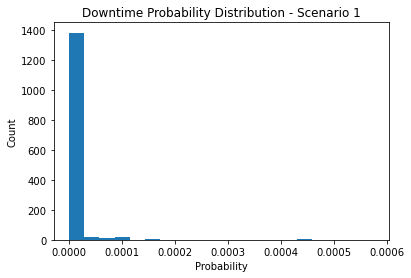


=== Scenario 2 Probability Stats ===
Min: 5.950836339252419e-07, Max: 0.016369346529245377, Mean: 3.1539184419671074e-05


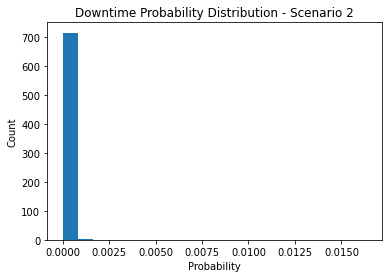


=== Scenario 3 Probability Stats ===
Min: 2.6382093665233697e-07, Max: 0.004020654130727053, Mean: 9.584904546500184e-06


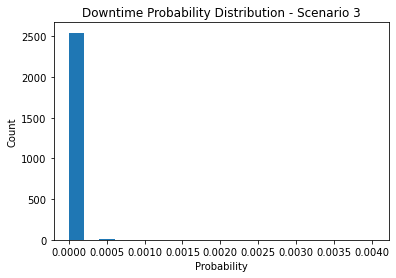

Most probable downtime for Scenario 1 : 2025-11-09 06:36:48
Most probable downtime for Scenario 2 : 2026-01-19 13:09:20
Most probable downtime for Scenario 3 : 2025-11-09 06:45:20


In [7]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Load the saved XGBoost models
clf_model = joblib.load('xgb_classifier.pkl')   # XGBoost classifier for downtime status
reg_model = joblib.load('xgb_regressor.pkl')      # XGBoost regressor for downtime timestamp

# Get the expected feature names (order must match training)
expected_features_clf = clf_model.feature_names_in_
expected_features_reg = reg_model.feature_names_in_

# Assume all_sheets is a dictionary of sheet_name: DataFrame,
# e.g., all_sheets = pd.read_excel("TestFile.xlsx", sheet_name=None)

final_predictions = []

for sheet_name, df in all_sheets.items():
    # Convert Timestamp to datetime and drop invalid rows
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    df = df.dropna(subset=['Timestamp'])
    
    # Create timestamp_numeric if missing (assume seconds since epoch)
    if 'timestamp_numeric' not in df.columns:
        df['timestamp_numeric'] = df['Timestamp'].apply(lambda x: x.timestamp())
    
    # Reindex to match training features for classifier
    X_test_clf = df.reindex(columns=expected_features_clf, fill_value=0).fillna(0)
    
    # Get predicted probabilities for downtime (class 1)
    downtime_probs = clf_model.predict_proba(X_test_clf)[:, 1]
    
    # Attach probabilities to the DataFrame
    df['downtime_prob'] = downtime_probs
    
    # Print probability distribution stats for debugging/inspection
    print(f"\n=== {sheet_name} Probability Stats ===")
    print(f"Min: {df['downtime_prob'].min()}, Max: {df['downtime_prob'].max()}, Mean: {df['downtime_prob'].mean()}")
    plt.hist(df['downtime_prob'], bins=20)
    plt.title(f'Downtime Probability Distribution - {sheet_name}')
    plt.xlabel('Probability')
    plt.ylabel('Count')
    plt.show()
    
    # Rank rows by downtime probability in descending order
    df_sorted = df.sort_values(by='downtime_prob', ascending=False)
    
    # Pick the top candidate (the row with the highest downtime probability)
    if not df_sorted.empty:
        top_candidate = df_sorted.iloc[0:1].copy()  # top 1 row as DataFrame
    else:
        top_candidate = pd.DataFrame()
    
    # If no candidate is found, prepare a placeholder row
    if top_candidate.empty:
        sheet_predictions = pd.DataFrame({
            'Sheet': [sheet_name],
            'Index': [None],
            'Downtime_Probability': [None],
            'Predicted_Downtime_Timestamp': ["No downtime predicted"]
        })
    else:
        # Prepare regressor input for the top candidate
        X_test_reg = top_candidate.reindex(columns=expected_features_reg, fill_value=0).fillna(0)
        y_pred_numeric = reg_model.predict(X_test_reg)
        predicted_datetimes = pd.to_datetime(y_pred_numeric, unit='s')
        
        sheet_predictions = pd.DataFrame({
            'Sheet': [sheet_name],
            'Index': top_candidate.index,
            'Downtime_Probability': top_candidate['downtime_prob'],
            'Predicted_Downtime_Timestamp': predicted_datetimes
        })
    
    final_predictions.append(sheet_predictions)

# Combine predictions from all sheets
if final_predictions:
    final_df = pd.concat(final_predictions, ignore_index=True)
    # Print output in the requested format for each scenario
    for sheet in final_df['Sheet'].unique():
        row = final_df[final_df['Sheet'] == sheet].iloc[0]
        print(f"Most probable downtime for {sheet} : {row['Predicted_Downtime_Timestamp']}")
    final_df.to_csv('Ranked_Downtime_Candidates.csv', index=False)
else:
    print("No predictions across any sheets.")
